Generate Graph Chart For:
review_dataset
1.Analysis for reviews given by customers
5.Analysis of top selling product categories
6.analysis for all reviews for all product categories

order_dataset
2.analysis of different payment methods used by the customers
3.Analysis of Top Consumer States of India
4.Analysis of top consumer cities of india
7.analysis of number of order per month per year
8.Analysis of number of orders Across parts of a day

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('review_dataset.csv')

In [3]:
data.head()

,product_name,product_url,category,status,stars
0,Sony PlayStation PS2 Gaming Console 150 GB Hard Disk With 50 Games Preloaded(Black),https://yoshops.com/products/sony-playstation-ps2-gaming-console-150-gb-hard-disk-with-50-games-preloaded-black,Toys & Games,Reviewd,5.0 star rating
1,Vmax HX 750 Quadcopter Drone (No Camera),https://yoshops.com/products/hx-750-remote-control-flying-drone,Toys & Games,Reviewd,5.0 star rating
2,Yoshops VR BOX Virtual Reality Glasses Headset 2.0 View Suitable For 4-6 Inch Smartphones,https://yoshops.com/products/yoshops-vr-box-virtual-reality-glasses-headset-2-0-view-suitable-for-4-6-inch-smartphones,Toys & Games,Reviewd,5.0 star rating
3,Sony PlayStation PS3 Console Slim 320 GB (Black),https://yoshops.com/products/sony-playstation-3-console-slim-320-gb-black,Toys & Games,Reviewd,4.9 star rating
4,Barbie Doll (pink),https://yoshops.com/products/barbie-doll,Toys & Games,Reviewd,4.9 star rating


In [4]:
data.shape

(1861, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  1861 non-null   object
 1   product_url   1861 non-null   object
 2   category      1861 non-null   object
 3   status        606 non-null    object
 4   stars         606 non-null    object
dtypes: object(5)
memory usage: 72.8+ KB


In [6]:
data.isnull().sum()

product_name       0
product_url        0
category           0
status          1255
stars           1255
dtype: int64

In [7]:
data_1 = data.copy()

In [8]:
data_1

,product_name,product_url,category,status,stars
0,Sony PlayStation PS2 Gaming Console 150 GB Hard Disk With 50 Games Preloaded(Black),https://yoshops.com/products/sony-playstation-ps2-gaming-console-150-gb-hard-disk-with-50-games-preloaded-black,Toys & Games,Reviewd,5.0 star rating
1,Vmax HX 750 Quadcopter Drone (No Camera),https://yoshops.com/products/hx-750-remote-control-flying-drone,Toys & Games,Reviewd,5.0 star rating
2,Yoshops VR BOX Virtual Reality Glasses Headset 2.0 View Suitable For 4-6 Inch Smartphones,https://yoshops.com/products/yoshops-vr-box-virtual-reality-glasses-headset-2-0-view-suitable-for-4-6-inch-smartphones,Toys & Games,Reviewd,5.0 star rating
3,Sony PlayStation PS3 Console Slim 320 GB (Black),https://yoshops.com/products/sony-playstation-3-console-slim-320-gb-black,Toys & Games,Reviewd,4.9 star rating
4,Barbie Doll (pink),https://yoshops.com/products/barbie-doll,Toys & Games,Reviewd,4.9 star rating
...,...,...,...,...,...
1856,"Hammer Pulse Oximeter Unisex Smartwatch with Body-Temp Sensor Monitoring, Calling and Activity Tracker",https://yoshops.com/products/hammer-pulse-oximeter-unisex-smartwatch-with-body-temp-sensor-monitoring-calling-and-activity-tracker,Mumbai,NaN,NaN
1857,Hammer Sting 2.0 Wireless Bluetooth Neckband Earphones Black with Long Battery Life,https://yoshops.com/products/hammer-sting-2-0-wireless-bluetooth-neckband-earphones-black-with-long-battery-life,Mumbai,NaN,NaN
1858,BBA Online Class Live Tuition Training Program with INTERNSHIP,https://yoshops.com/products/bba-online-class-live-tuition-training-program-with-internship,Mumbai,NaN,NaN
1859,B.TECH Online Class Live Tuition Training Program with INTERNSHIP,https://yoshops.com/products/b-tech-online-class-live-tuition-training-program-with-internship,Mumbai,Reviewd,5.0 star rating


In [9]:
data_1['status'] = data_1['status'].fillna('unreviewed')

In [10]:
data_1['status'].str.contains('unreviewed')

0       False
1       False
2       False
3       False
4       False
        ...  
1856     True
1857     True
1858     True
1859    False
1860     True
Name: status, Length: 1861, dtype: bool

<AxesSubplot:xlabel='status', ylabel='count'>

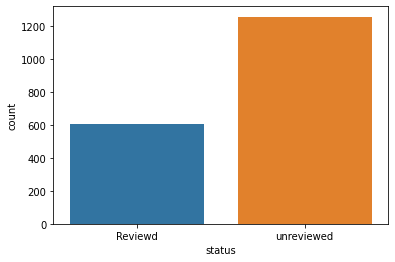

In [11]:
sns.countplot(x=data_1['status'])

In [12]:
customers_review = data.dropna(axis=0, how='any')
customers_review.head()

,product_name,product_url,category,status,stars
0,Sony PlayStation PS2 Gaming Console 150 GB Hard Disk With 50 Games Preloaded(Black),https://yoshops.com/products/sony-playstation-ps2-gaming-console-150-gb-hard-disk-with-50-games-preloaded-black,Toys & Games,Reviewd,5.0 star rating
1,Vmax HX 750 Quadcopter Drone (No Camera),https://yoshops.com/products/hx-750-remote-control-flying-drone,Toys & Games,Reviewd,5.0 star rating
2,Yoshops VR BOX Virtual Reality Glasses Headset 2.0 View Suitable For 4-6 Inch Smartphones,https://yoshops.com/products/yoshops-vr-box-virtual-reality-glasses-headset-2-0-view-suitable-for-4-6-inch-smartphones,Toys & Games,Reviewd,5.0 star rating
3,Sony PlayStation PS3 Console Slim 320 GB (Black),https://yoshops.com/products/sony-playstation-3-console-slim-320-gb-black,Toys & Games,Reviewd,4.9 star rating
4,Barbie Doll (pink),https://yoshops.com/products/barbie-doll,Toys & Games,Reviewd,4.9 star rating


In [13]:
customers_review.isnull().sum()

product_name    0
product_url     0
category        0
status          0
stars           0
dtype: int64

In [14]:
customers_review.duplicated().sum()

0

#### Top 10 categories by ratings

In [15]:
customers_review['star_ratings'] = customers_review['stars'].str.slice(start=0, stop=3)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6292\4195501407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_review['star_ratings'] = customers_review['stars'].str.slice(start=0, stop=3)


In [16]:
customers_review=customers_review.drop(labels='stars', axis=1)
customers_review.head()

,product_name,product_url,category,status,star_ratings
0,Sony PlayStation PS2 Gaming Console 150 GB Hard Disk With 50 Games Preloaded(Black),https://yoshops.com/products/sony-playstation-ps2-gaming-console-150-gb-hard-disk-with-50-games-preloaded-black,Toys & Games,Reviewd,5.0
1,Vmax HX 750 Quadcopter Drone (No Camera),https://yoshops.com/products/hx-750-remote-control-flying-drone,Toys & Games,Reviewd,5.0
2,Yoshops VR BOX Virtual Reality Glasses Headset 2.0 View Suitable For 4-6 Inch Smartphones,https://yoshops.com/products/yoshops-vr-box-virtual-reality-glasses-headset-2-0-view-suitable-for-4-6-inch-smartphones,Toys & Games,Reviewd,5.0
3,Sony PlayStation PS3 Console Slim 320 GB (Black),https://yoshops.com/products/sony-playstation-3-console-slim-320-gb-black,Toys & Games,Reviewd,4.9
4,Barbie Doll (pink),https://yoshops.com/products/barbie-doll,Toys & Games,Reviewd,4.9


In [17]:
customers_review.shape

(606, 5)

In [18]:
customers_review['star_ratings'] = customers_review['star_ratings'].astype(float)
customers_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 0 to 1859
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  606 non-null    object 
 1   product_url   606 non-null    object 
 2   category      606 non-null    object 
 3   status        606 non-null    object 
 4   star_ratings  606 non-null    float64
dtypes: float64(1), object(4)
memory usage: 28.4+ KB


Filtering the Data of customers_review by column[category] by unselecting the [chennai, bengaluru, more, mumbai] Rows

In [19]:
customers_review = customers_review[customers_review['category'].apply(lambda val: all(val != s for s in['Chennai', 'Mumbai', 'More', 'Bengaluru']))]

In [20]:
customers_review.head()

,product_name,product_url,category,status,star_ratings
0,Sony PlayStation PS2 Gaming Console 150 GB Hard Disk With 50 Games Preloaded(Black),https://yoshops.com/products/sony-playstation-ps2-gaming-console-150-gb-hard-disk-with-50-games-preloaded-black,Toys & Games,Reviewd,5.0
1,Vmax HX 750 Quadcopter Drone (No Camera),https://yoshops.com/products/hx-750-remote-control-flying-drone,Toys & Games,Reviewd,5.0
2,Yoshops VR BOX Virtual Reality Glasses Headset 2.0 View Suitable For 4-6 Inch Smartphones,https://yoshops.com/products/yoshops-vr-box-virtual-reality-glasses-headset-2-0-view-suitable-for-4-6-inch-smartphones,Toys & Games,Reviewd,5.0
3,Sony PlayStation PS3 Console Slim 320 GB (Black),https://yoshops.com/products/sony-playstation-3-console-slim-320-gb-black,Toys & Games,Reviewd,4.9
4,Barbie Doll (pink),https://yoshops.com/products/barbie-doll,Toys & Games,Reviewd,4.9


In [21]:
category_star_rating = pd.DataFrame()

In [22]:
category_by_ratings = customers_review[['category', 'star_ratings']].copy()

In [23]:
category_by_ratings.head()

,category,star_ratings
0,Toys & Games,5.0
1,Toys & Games,5.0
2,Toys & Games,5.0
3,Toys & Games,4.9
4,Toys & Games,4.9


In [24]:
category_by_ratings=category_by_ratings.groupby(['category'])['star_ratings'].mean()

In [25]:
category_by_ratings=category_by_ratings.to_frame(name='Star_ratings')

In [33]:
category_by_ratings=category_by_ratings.round(decimals=1)

In [27]:
category_star_rating = customers_review[['category']]

In [28]:
category_star_rating=category_star_rating.groupby(['category']).value_counts()

In [29]:
category_star_rating = category_star_rating.to_frame(name='No._of_Times')

In [35]:
category_with_ratings=pd.merge(category_star_rating, category_by_ratings, how='inner', on='category')

#### Most purchased category with it's ratings

In [39]:
category_with_ratings=category_with_ratings.sort_values(by=['No._of_Times'], ascending=False).head(10)

In [41]:
category_with_ratings.head()

,No._of_Times,Star_ratings
category,,
Mobiles,57,4.8
Services,40,5.0
Toys & Games,35,4.8
Headphones,34,4.9
Accessories,26,4.9


#### Visualizing the Top Categories

In [ ]:
sns.barplot(data=category_with_ratings, x='No._of_Times', y='Star_ratings', hue='category')
plt.show()